## Group No - 26

## Group Member Names:
1. Sunil Mittal (BITS ID : 2021SC04968)
2. Indira Saha
3. Vikram Panwar
4. Muhammad Iqbal J

# 1. Import the required libraries

In [34]:
##---------Type the code below this line------------------##
import tensorflow as tf
from tensorflow import keras
 #Below is the dataset we'll be using
from tensorflow.keras.datasets import fashion_mnist
 #The type of model we'll be using
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD, RMSprop,Adam

from tensorflow.keras.utils import to_categorical
# The layers we'll be using in our model
from tensorflow.keras.layers import Dense, Flatten, Dropout 
from tensorflow.keras.regularizers import l2

#from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
#from sklearn.preprocessing import StandardScaler

#import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
model_results = []


In [35]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# 2. Data Acquisition  -- Score: 0.5 Mark
 
For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Code for converting the above downloaded data into a form suitable for DL



In [36]:
##---------Type the code below this line------------------##
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#train_labels = to_categorical(train_labels)
#test_labels = to_categorical(test_labels)
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
#['t-shirt','trouser','PullOver','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
to_categorical(train_labels)
to_categorical(test_labels)

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## 2.1 Write your observations from the above. 

1. Size of the dataset
2. What type of data attributes are there?
3. What are you classifying?
4. Plot the distribution of the categories of the target / label. 



Size of the dataset:
Training set:  (60000, 28, 28)
Test set:  (10000, 28, 28)

Data attributes:
Type of data:  <class 'numpy.ndarray'>
Data type:  uint8
Shape of an image:  (28, 28)

We are classifying images into the following categories:
['t-shirt', 'trouser', 'PullOver', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']


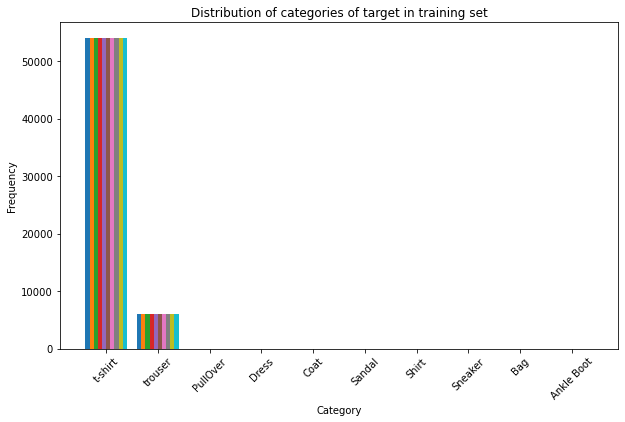

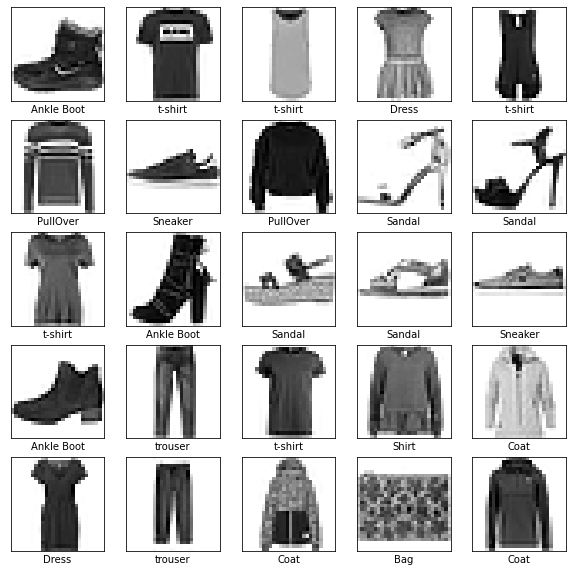

In [37]:
# Task 1: Size of the dataset
print("Size of the dataset:")
print("Training set: ", train_images.shape)
print("Test set: ", test_images.shape)

# Task 2: Data attributes
print("\nData attributes:")
print("Type of data: ", type(test_images))
print("Data type: ", test_images.dtype)
print("Shape of an image: ", test_images[0].shape)

# Task 3: Classifying
#class_names=['t-shirt','trouser','PullOver','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
class_names=['t-shirt','trouser','PullOver','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
print("\nWe are classifying images into the following categories:")
print(class_names)

# Task 4: Plot the distribution of the categories of the target/label
plt.figure(figsize=(10,6))
plt.hist(to_categorical(train_labels), bins=range(11), align='left', rwidth=0.8)
plt.xticks(range(10), class_names, rotation=45)
plt.title('Distribution of categories of target in training set')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

# Task 5: Plot the distribution of the categories with the images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])


# 3. Data Preparation -- Score: 1 Mark

Perform the data prepracessing that is required for the data that you have downloaded. 


This stage depends on the dataset that is used. 

## 3.1 Apply pre-processing techiniques

* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies
* Encode categorical data
* Normalize the data
* Feature Engineering
* Stop word removal, lemmatiation, stemming, vectorization


IF ANY

In [38]:
##---------Type the code below this line------------------##
# Normalize the pixel values of the images to be between 0 and 1
print("Normalize the pixel values of the images to be between 0 and 1\n")
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convert the labels (integers) into one-hot vectors
print("Convert the labels (integers) into one-hot vectors\n")
train_labels_encoded = to_categorical(train_labels)
test_labels_encoded = to_categorical(test_labels)

# Feature Engineering (Flatten the images)
print("Flatten the Images \n")
#train_images = train_images.reshape((train_images.shape[0], train_images.shape[1] * train_images.shape[2]))
#test_images = test_images.reshape((test_images.shape[0], test_images.shape[1] * test_images.shape[2]))
train_images = train_images.reshape(-1, 28, 28)
test_images = test_images.reshape(-1, 28, 28)

Normalize the pixel values of the images to be between 0 and 1

Convert the labels (integers) into one-hot vectors

Flatten the Images 



## 3.2 Identify the target variables (Do Not Run the Below Code again).

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.





In [58]:
##---------Type the code below this line------------------##
##The load_data function used used in prior section is to load the Fashion-MNIST dataset and separate it into Images and Labels (Images beging feature 
# and Label being Label).It provides separate sets for training and testing.
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#The to_categorical function is used to perform one-hot encoding on the target (y). After this step, each label is represented by a binary vector 
# with a length equal to the number of classes. For example, if the original label is 2, and there are 10 classes in total, the new label after 
# one-hot encoding will be a vector: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0].
train_labels_encoded = to_categorical(train_labels)
test_labels_encoded = to_categorical(test_labels)

## 3.3 Split the data into training set and testing set (Do Not Run the Below Code again).

In [ ]:
##---------Type the code below this line------------------##

#Below Code loads the data and split into training and testing set
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## 3.4 Preprocessing report (Do Not Run the Below Code again).

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present 
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 
* to encode categorical data 
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset


In [15]:
##---------Type the answer below this line------------------##
# Normalize the pixel values of the images to be between 0 and 1
print("Normalize the pixel values of the images to be between 0 and 1\n")
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convert the labels (integers) into one-hot vectors
print("Convert the labels (integers) into one-hot vectors\n")
#train_labels = to_categorical(train_labels)
#test_labels = to_categorical(test_labels)


# Feature Engineering (Flatten the images)
print("Flatten the Images \n")
train_images = train_images.reshape((train_images.shape[0], train_images.shape[1] * train_images.shape[2]))
test_images = test_images.reshape((test_images.shape[0], test_images.shape[1] * test_images.shape[2]))

Normalize the pixel values of the images to be between 0 and 1

Convert the labels (integers) into one-hot vectors

Flatten the Images 



IndexError: tuple index out of range

# 4. Deep Neural Network Architecture - Score:  Marks


## 4.1 Design the architecture that you will be using

* Sequential Model Building with Activation for each layer.
* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
* Use Relu Activation function in each hidden layer
* Use Sigmoid / softmax Activation function in the output layer as required

DO NOT USE CNN OR RNN. 

In [ ]:
##---------Type the code below this line------------------##

## 4.2 DNN Report

Report the following and provide justification for the same.



* Number of layers
* Number of units in each layer
* Total number of trainable parameters 



In [39]:
##---------Type the answer below this line------------------##
#Below Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor, 
#but it doesn't handle models with multiple inputs or outputs, which are better handled with the Keras functional API.


# ReLU stands for Rectified Linear Unit, and it is a type of activation function commonly used in neural networks and deep learning models. 
# The function returns 0 if the input is less than 0, and it returns the input itself if the input is equal to or greater than 0.
# Mathematically, it can be represented as:
# scss
# Copy code
# f(x) = max(0, x)
# Where x is the input to a neuron.
# This means that the ReLU function is linear for all positive values, and is zero for all negative values. 
# It is a non-linear function overall (since it isn't linear for negative values), which is important because this non-linearity helps
# neural networks learn from complex data.
# The ReLU activation function has become very popular for several reasons:

# It helps mitigate the vanishing gradient problem, which is a challenge when training deep neural networks.
# It introduces non-linearity into the network without requiring computationally expensive operations like exponentials or cosines.
# Its simplicity allows the network to learn much faster.
# However, ReLU units can be fragile during training and can "die". For example, a large gradient flowing through a ReLU neuron can cause the weights to update in such a way that the neuron will never activate on any datapoint again. If this happens, then the gradient flowing through the unit will forever be zero from that point on. This is often referred to as the "dying ReLU" problem. Some variants like the Leaky ReLU or Parametric ReLU have been proposed to mitigate this problem.


# The softmax activation function is typically used in the output layer of a neural network model for multi-class classification problems.
# There are a few key reasons why softmax is used in this context:
# Probabilistic Outputs: Softmax converts raw output scores from the previous layer into probabilities for each class. 
# This is particularly useful in classification problems where we're interested in knowing the probabilities of each class.
# Multi-class Classification: Unlike functions like the sigmoid function, which are used for binary classification, 
# softmax is useful for multi-class classification. This is because it generates a probability distribution over K different possible outcomes, 
# making it perfect for representing categorical outcomes.
# Differentiability: The softmax function is differentiable, which means we can calculate derivatives. 
# This is a critical property that lets us use backpropagation to train the neural network.
# Highlighting the Maximum Input: The softmax function tends to highlight the largest values and suppress values 
# which are significantly below the maximum one. This characteristic can be very useful when we want to identify a clear choice out of a set of options.

model = Sequential([
    Flatten(input_shape=(28, 28)),  # Input layer: flattens the 28x28 pixel image into a 784 element array
    Dense(512, activation='relu'),  # Hidden layer: 512 neurons, ReLU activation
    Dense(256, activation='relu'),  # Hidden layer: 256 neurons, ReLU activation
    Dense(128, activation='relu'),  # Hidden layer: 128 neurons, ReLU activation
    Dense(10, activation='softmax')  # Output layer: 10 neurons (for the 10 classes), Softmax activation
])
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 512)               401920    
                                                                 
 dense_25 (Dense)            (None, 256)               131328    
                                                                 
 dense_26 (Dense)            (None, 128)               32896     
                                                                 
 dense_27 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


# 5. Training the model - Score: 1 Mark


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations

Compile with categorical CE loss and metric accuracy.

In [40]:
##---------Type the code below this line------------------##
# Compile the model. We use SGD as our optimizer, categorical cross entropy as our loss function, 
# and accuracy as the metric to track during training.
# Define the SGD optimizer with learning rate 0.01
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy']
)

## 5.2 Train the model

Train Model with cross validation, with total time taken shown for 20 epochs.

Use SGD.

In [41]:
##---------Type the code below this line------------------##
# Train the model for 10 epochs using a batch size of 32. 
# The model learns the optimal weights and biases during this process.
history = model.fit(train_images, train_labels_encoded, epochs=10, batch_size=32, validation_data=(test_images, test_labels_encoded))
#history = model.fit(train_images, train_labels_encoded, epochs=10, batch_size=32)
loss, accuracy = model.evaluate(test_images, test_labels_encoded, verbose=0)
model_result = {
    'model': model.name,
    'loss': loss,
    'accuracy': accuracy
}

# Add the results to the list
model_results.append(model_result)


Epoch 1/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.6846 - accuracy: 0.7719 - val_loss: 0.5199 - val_accuracy: 0.8111
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4616 - accuracy: 0.8381 - val_loss: 0.4480 - val_accuracy: 0.8416
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4157 - accuracy: 0.8547 - val_loss: 0.4388 - val_accuracy: 0.8421
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3865 - accuracy: 0.8618 - val_loss: 0.4195 - val_accuracy: 0.8463
Epoch 5/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3652 - accuracy: 0.8693 - val_loss: 0.3976 - val_accuracy: 0.8600
Epoch 6/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.3481 - accuracy: 0.8753 - val_loss: 0.3811 - val_accuracy: 0.8631
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3341 - accuracy: 0.8801 - val_loss: 0.3684 -

Justify your choice of optimizers and regulizations used and the hyperparameters tuned


<p>
Stochastic Gradient Descent (SGD) is a simple yet very efficient optimization algorithm used to find the values of parameters that minimize a cost function. Here are some advantages of using SGD:
<ul>
<li>
Efficiency: SGD is computationally efficient. This is because it only uses a single sample (or a small batch) to perform each update, which can be much faster than running the entire dataset in each iteration like Batch Gradient Descent.
</li>
<li>
Memory usage: SGD uses less memory as it needs to store only one (or a small batch of) training sample(s) at a time. This allows it to handle large-scale data sets that wouldn't fit entirely in memory.
</li>
<li>
Noise Reduction: The noisy updates can help the model to avoid local minima. Each noisy step is not guaranteed to decrease the cost function, but on average, it does.
</li>
<li>
Easy to Implement: SGD is simple and easy to implement.
</li>
<li>
Convergence: Under appropriate conditions, it converges to the global minimum for convex error surfaces and to a local minimum for non-convex surfaces.
</li>
</ul>
<p>
Despite above advantages, SGD has several issues like the need for manual tuning of the learning rate, lack of an adaptive learning rate for different parameters, and its slow convergence. Some of these issues are addressed by variants and improvements over SGD, such as Momentum SGD, AdaGrad, RMSProp, and Adam.
</p>
</p>

<p>
The categorical_crossentropy loss function which is being used in our case is generally being used in multiclass classification problems where the labels are one-hot encoded.

Below are some advantages of categorical_crossentropy loss function.
<ol>
<li>Applicability to Multiclass Problems: It is suitable for multiclass classification problems, which fits the Fashion-MNIST problem since there are 10 classes to predict.</li>

<li>Performance: It often performs well in practice, helping the model to converge to a solution that accurately classifies the inputs.</li>

<li>Interpretability: The categorical_crossentropy function is a measure of the dissimilarity between the distribution of observed class labels and the predicted probabilities of class membership. In other words, it tries to minimize the difference between the actual and predicted probability distributions.</li>

<li>Stability: It's more numerically stable than using other loss functions like Mean Squared Error for classification problems, particularly for a high number of classes.</li>

The loss function is one of the key components in configuring your model. It's what your model is trying to minimize during the training process. Different problems and different datasets often require different loss functions, and sometimes experimenting with different choices can yield better performance. In the context of your problem and given that your labels are one-hot encoded, categorical_crossentropy is a reasonable choice.
</p>

In [ ]:
##---------Type the answers below this line------------------##


# 6. Test the model - 0.5 marks


In [42]:
##---------Type the code below this line------------------##
# Predict the labels of the test set
y_pred = model.predict(test_images)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred, axis = 1) 
# Convert test observations to one hot vectors
y_true = np.argmax(test_labels_encoded, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
# compute accuracy
accuracy = accuracy_score(y_true, y_pred_classes)

# compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


313/313 [==============================] - 2s 5ms/step
Accuracy: 0.8723
Precision: 0.8730886433493328
Recall: 0.8723
F1 Score: 0.8704852412951545


# 7. Intermediate result  - Score: 1 mark

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history. 
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


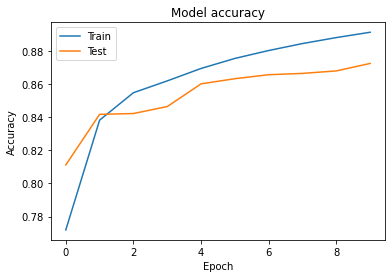

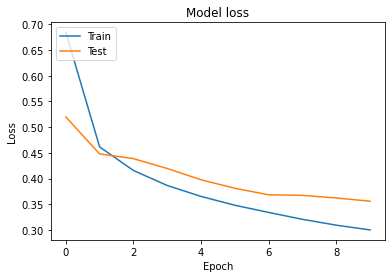

Test loss: 0.35590416193008423
Test accuracy: 0.8723000288009644
313/313 [==============================] - 2s 7ms/step


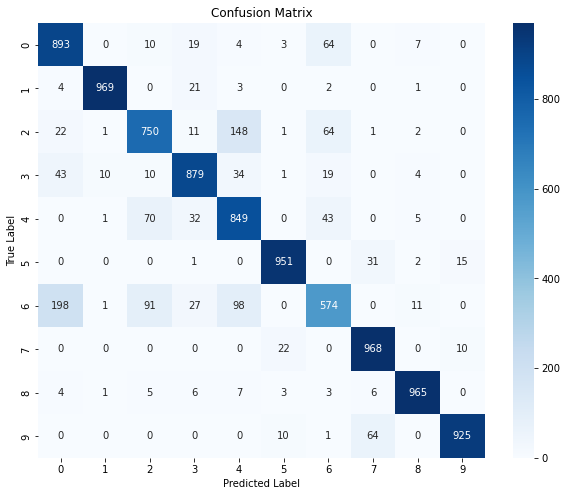


Classification Report:
               precision    recall  f1-score   support

           0     0.7672    0.8930    0.8253      1000
           1     0.9858    0.9690    0.9773      1000
           2     0.8013    0.7500    0.7748      1000
           3     0.8825    0.8790    0.8808      1000
           4     0.7428    0.8490    0.7923      1000
           5     0.9596    0.9510    0.9553      1000
           6     0.7455    0.5740    0.6486      1000
           7     0.9047    0.9680    0.9353      1000
           8     0.9679    0.9650    0.9664      1000
           9     0.9737    0.9250    0.9487      1000

    accuracy                         0.8723     10000
   macro avg     0.8731    0.8723    0.8705     10000
weighted avg     0.8731    0.8723    0.8705     10000



In [43]:
##---------Type the code below this line------------------##
# Plot the training and validation accuracy history
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the training and validation loss history
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Report the testing accuracy and loss
test_loss, test_accuracy = model.evaluate(test_images, test_labels_encoded, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# Predict the values from the test dataset
y_pred = model.predict(test_images)
# Convert predictions from one hot encoded to labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
conf_mtx = confusion_matrix(test_labels, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mtx, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Report performance metrics
print('\nClassification Report:\n', classification_report(test_labels, y_pred_classes, digits=4))

# 8. Model architecture - Score: 1 mark


Modify the architecture designed in section 4.1 

1. by decreasing one layer
2. by increasing one layer

For example, if the architecture in 4.1 has 5 layers, then 8.1 should have 4 layers and 8.2 should have 6 layers.

Plot the comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)



### 8.1 Decreasing One Layer

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 512)               401920    
                                                                 
 dense_29 (Dense)            (None, 256)               131328    
                                                                 
 dense_30 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.6823 - accuracy: 0.7772 - val_loss: 0.5268 - val_accuracy: 0.8152
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4724 - accuracy: 0.8371 - val_loss: 0.4704 - val_accuracy: 0.8354
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4297 - accuracy: 0.8495 - val_loss: 0.4433 - val_accuracy: 0.8414
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4027 - accuracy: 0.8595 - val_loss: 0.4362 - val_accuracy: 0.8454
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3831 - accuracy: 0.8652 - val_loss: 0.4078 - val_accuracy: 0.8540
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3670 - accuracy: 0.8712 - val_loss: 0.4053 - val_accuracy: 0.8577
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3533 - accuracy: 0.8755 - val_loss: 0.3904 -

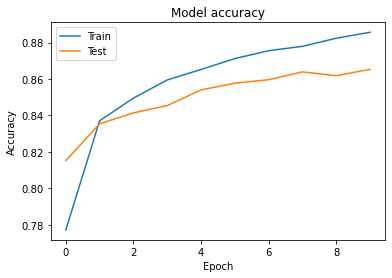

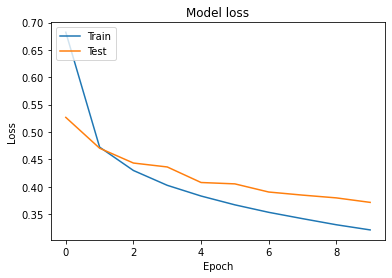

Test loss: 0.37149250507354736
Test accuracy: 0.8652999997138977
313/313 [==============================] - 1s 2ms/step


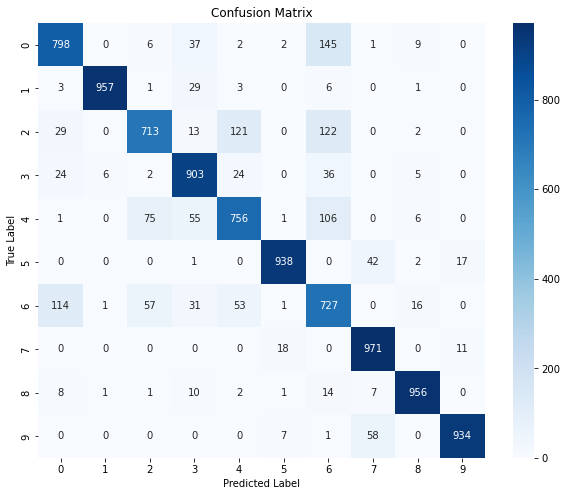


Classification Report:
               precision    recall  f1-score   support

           0     0.8168    0.7980    0.8073      1000
           1     0.9917    0.9570    0.9740      1000
           2     0.8339    0.7130    0.7687      1000
           3     0.8369    0.9030    0.8687      1000
           4     0.7867    0.7560    0.7710      1000
           5     0.9690    0.9380    0.9533      1000
           6     0.6283    0.7270    0.6741      1000
           7     0.8999    0.9710    0.9341      1000
           8     0.9589    0.9560    0.9574      1000
           9     0.9709    0.9340    0.9521      1000

    accuracy                         0.8653     10000
   macro avg     0.8693    0.8653    0.8661     10000
weighted avg     0.8693    0.8653    0.8661     10000



In [44]:
##---------Type the code below this line------------------##
model_OneLayer_Less = Sequential([
    Flatten(input_shape=(28, 28)),  # Input layer: flattens the 28x28 pixel image into a 784 element array
    Dense(512, activation='relu'),  # Hidden layer: 512 neurons, ReLU activation
    Dense(256, activation='relu'),  # Hidden layer: 256 neurons, ReLU activation
    Dense(10, activation='softmax')  # Output layer: 10 neurons (for the 10 classes), Softmax activation
])
model_OneLayer_Less.summary()
sgd = SGD(lr=0.01)
model_OneLayer_Less.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy']
)
history_OneLayer_Less = model_OneLayer_Less.fit(train_images, train_labels_encoded, epochs=10, batch_size=32, validation_data=(test_images, test_labels_encoded))
loss, accuracy = model_OneLayer_Less.evaluate(test_images, test_labels_encoded, verbose=0)
model_result = {
    'model': 'Model with One Layer less',
    'loss': loss,
    'accuracy': accuracy
}
# Add the results to the list
model_results.append(model_result)
plt.figure()
plt.plot(history_OneLayer_Less.history['accuracy'])
plt.plot(history_OneLayer_Less.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the training and validation loss history
plt.figure()
plt.plot(history_OneLayer_Less.history['loss'])
plt.plot(history_OneLayer_Less.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Report the testing accuracy and loss
test_loss, test_accuracy = model_OneLayer_Less.evaluate(test_images, test_labels_encoded, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# Predict the values from the test dataset
y_pred = model_OneLayer_Less.predict(test_images)
# Convert predictions from one hot encoded to labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
conf_mtx = confusion_matrix(test_labels, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mtx, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Report performance metrics
print('\nClassification Report:\n', classification_report(test_labels, y_pred_classes, digits=4))

### 8.2 Increasing One Layer

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_31 (Dense)            (None, 512)               401920    
                                                                 
 dense_32 (Dense)            (None, 256)               131328    
                                                                 
 dense_33 (Dense)            (None, 128)               32896     
                                                                 
 dense_34 (Dense)            (None, 64)                8256      
                                                                 
 dense_35 (Dense)            (None, 10)                650       
                                                                 
Total params: 575,050
Trainable params: 575,050
Non-tr

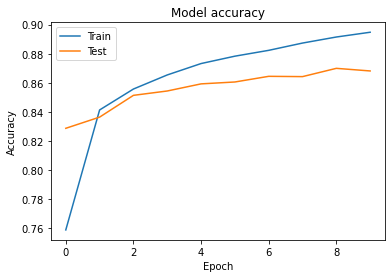

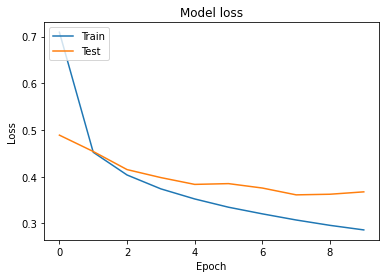

Test loss: 0.3675128221511841
Test accuracy: 0.8680999875068665
313/313 [==============================] - 1s 4ms/step


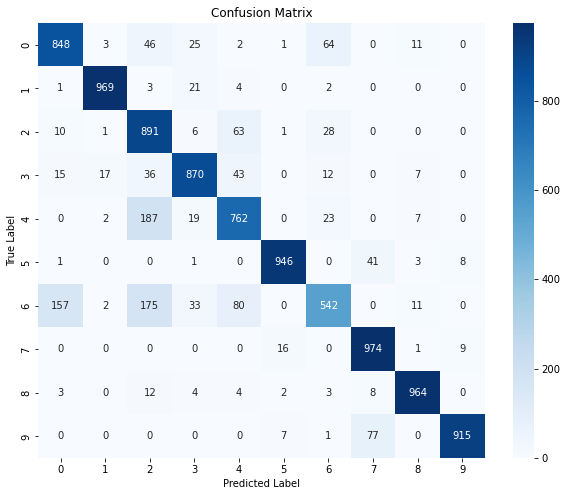


Classification Report:
               precision    recall  f1-score   support

           0     0.8193    0.8480    0.8334      1000
           1     0.9748    0.9690    0.9719      1000
           2     0.6600    0.8910    0.7583      1000
           3     0.8887    0.8700    0.8792      1000
           4     0.7954    0.7620    0.7783      1000
           5     0.9723    0.9460    0.9589      1000
           6     0.8030    0.5420    0.6472      1000
           7     0.8855    0.9740    0.9276      1000
           8     0.9602    0.9640    0.9621      1000
           9     0.9818    0.9150    0.9472      1000

    accuracy                         0.8681     10000
   macro avg     0.8741    0.8681    0.8664     10000
weighted avg     0.8741    0.8681    0.8664     10000



In [45]:
model_One_Extra_Layer = Sequential([
    Flatten(input_shape=(28, 28)),  # Input layer: flattens the 28x28 pixel image into a 784 element array
    Dense(512, activation='relu'),  # Hidden layer: 512 neurons, ReLU activation
    Dense(256, activation='relu'),  # Hidden layer: 256 neurons, ReLU activation
    Dense(128, activation='relu'),  # Hidden layer: 128 neurons, ReLU activation
    Dense(64, activation='relu'),  # Hidden layer: 64 neurons, ReLU activation
    Dense(10, activation='softmax')  # Output layer: 10 neurons (for the 10 classes), Softmax activation
])
model_One_Extra_Layer.summary()
sgd = SGD(learning_rate=0.01)
model_One_Extra_Layer.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy']
)
history_One_Extra_Layer = model_One_Extra_Layer.fit(train_images, train_labels_encoded, epochs=10, batch_size=32, validation_data=(test_images, test_labels_encoded))
loss, accuracy = model_One_Extra_Layer.evaluate(test_images, test_labels_encoded, verbose=0)
model_result = {
    'model': 'Model with One Layer More',
    'loss': loss,
    'accuracy': accuracy
}
# Add the results to the list
model_results.append(model_result)
plt.figure()
plt.plot(history_One_Extra_Layer.history['accuracy'])
plt.plot(history_One_Extra_Layer.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the training and validation loss history
plt.figure()
plt.plot(history_One_Extra_Layer.history['loss'])
plt.plot(history_One_Extra_Layer.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Report the testing accuracy and loss
test_loss, test_accuracy = model_One_Extra_Layer.evaluate(test_images, test_labels_encoded, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# Predict the values from the test dataset
y_pred = model_One_Extra_Layer.predict(test_images)
# Convert predictions from one hot encoded to labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
conf_mtx = confusion_matrix(test_labels, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mtx, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Report performance metrics
print('\nClassification Report:\n', classification_report(test_labels, y_pred_classes, digits=4))

# 9. Regularisations - Score: 1 mark

Modify the architecture designed in section 4.1

1. Dropout of ratio 0.25
2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04. 

Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)



### 9.1 Dropout of ratio 0.25

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_37 (Dense)            (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_38 (Dense)            (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)              

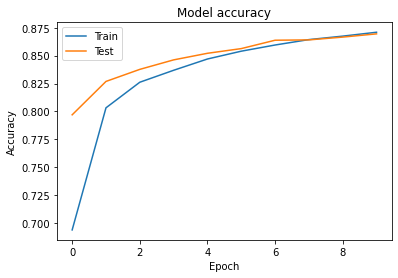

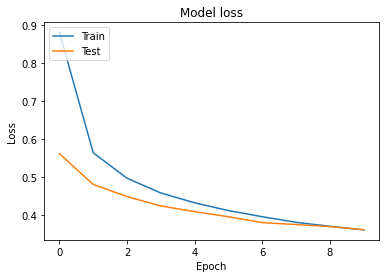

Test loss: 0.36180397868156433
Test accuracy: 0.8694999814033508
313/313 [==============================] - 1s 4ms/step


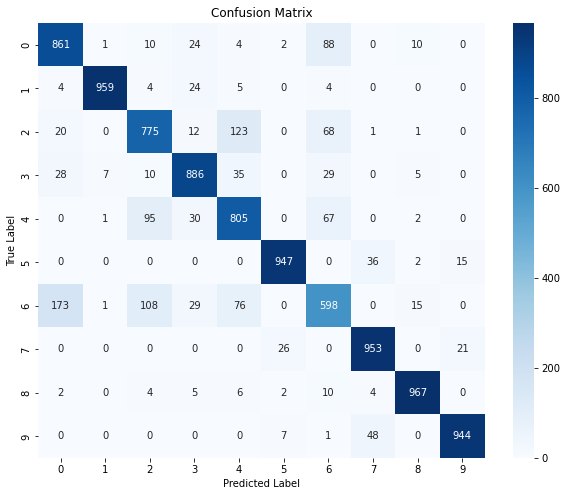


Classification Report:
               precision    recall  f1-score   support

           0     0.7914    0.8610    0.8247      1000
           1     0.9897    0.9590    0.9741      1000
           2     0.7704    0.7750    0.7727      1000
           3     0.8772    0.8860    0.8816      1000
           4     0.7638    0.8050    0.7838      1000
           5     0.9624    0.9470    0.9546      1000
           6     0.6913    0.5980    0.6413      1000
           7     0.9146    0.9530    0.9334      1000
           8     0.9651    0.9670    0.9660      1000
           9     0.9633    0.9440    0.9535      1000

    accuracy                         0.8695     10000
   macro avg     0.8689    0.8695    0.8686     10000
weighted avg     0.8689    0.8695    0.8686     10000



In [46]:
##---------Type the code below this line------------------##
model_Dropout = Sequential([
    Flatten(input_shape=(28, 28)),  # Input layer: flattens the 28x28 pixel image into a 784 element array
    Dense(512, activation='relu'),  # Hidden layer: 512 neurons, ReLU activation
    Dropout(0.25),  # Dropout layer: 0.25 ratio
    Dense(256, activation='relu'),  # Hidden layer: 256 neurons, ReLU activation, L2 regularization
    Dropout(0.25),  # Dropout layer: 0.25 ratio
    Dense(128, activation='relu'),  # Hidden layer: 128 neurons, ReLU activation, L2 regularization
    Dropout(0.25),  # Dropout layer: 0.25 ratio
    Dense(10, activation='softmax')  # Output layer: 10 neurons (for the 10 classes), Softmax activation
])
model_Dropout.summary()
sgd = SGD(learning_rate=0.01)
model_Dropout.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy']
)
history_Dropout = model_Dropout.fit(train_images, train_labels_encoded, epochs=10, batch_size=32, validation_data=(test_images, test_labels_encoded))
loss, accuracy = model_Dropout.evaluate(test_images, test_labels_encoded, verbose=0)
model_result = {
    'model': 'Model with Drop Out',
    'loss': loss,
    'accuracy': accuracy
}
# Add the results to the list
model_results.append(model_result)
plt.figure()
plt.plot(history_Dropout.history['accuracy'])
plt.plot(history_Dropout.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the training and validation loss history
plt.figure()
plt.plot(history_Dropout.history['loss'])
plt.plot(history_Dropout.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Report the testing accuracy and loss
test_loss, test_accuracy = model_Dropout.evaluate(test_images, test_labels_encoded, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# Predict the values from the test dataset
y_pred = model_Dropout.predict(test_images)
# Convert predictions from one hot encoded to labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
conf_mtx = confusion_matrix(test_labels, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mtx, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Report performance metrics
print('\nClassification Report:\n', classification_report(test_labels, y_pred_classes, digits=4))

### 9.2 Dropout of ratio 0.25 with L2 regulariser with factor 1e−04

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_40 (Dense)            (None, 512)               401920    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_41 (Dense)            (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_42 (Dense)            (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)             

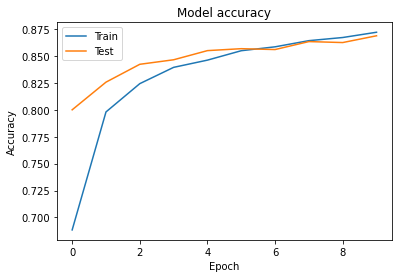

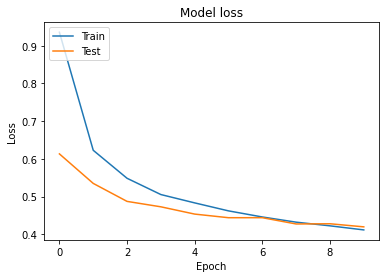

Test loss: 0.4194435179233551
Test accuracy: 0.8687999844551086
313/313 [==============================] - 1s 4ms/step


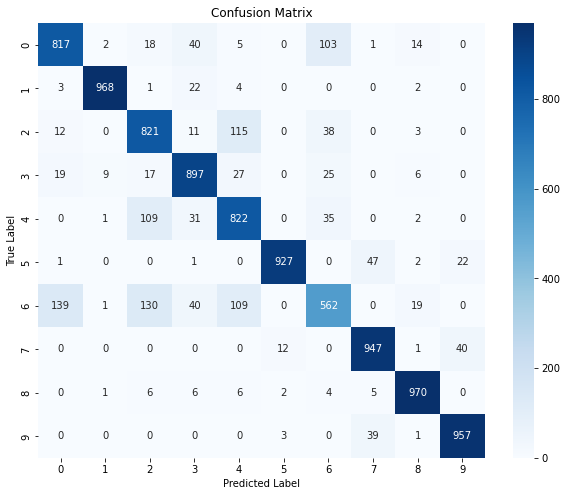


Classification Report:
               precision    recall  f1-score   support

           0     0.8244    0.8170    0.8207      1000
           1     0.9857    0.9680    0.9768      1000
           2     0.7450    0.8210    0.7812      1000
           3     0.8559    0.8970    0.8760      1000
           4     0.7555    0.8220    0.7874      1000
           5     0.9820    0.9270    0.9537      1000
           6     0.7327    0.5620    0.6361      1000
           7     0.9115    0.9470    0.9289      1000
           8     0.9510    0.9700    0.9604      1000
           9     0.9392    0.9570    0.9480      1000

    accuracy                         0.8688     10000
   macro avg     0.8683    0.8688    0.8669     10000
weighted avg     0.8683    0.8688    0.8669     10000



In [47]:
model_l2_regulariser = Sequential([
    Flatten(input_shape=(28, 28)),  # Input layer: flattens the 28x28 pixel image into a 784 element array
    Dense(512, activation='relu'),  # Hidden layer: 512 neurons, ReLU activation
    Dropout(0.25),  # Dropout layer: 0.25 ratio
    Dense(256, activation='relu', kernel_regularizer=l2(1e-4)),  # Hidden layer: 256 neurons, ReLU activation, L2 regularization
    Dropout(0.25),  # Dropout layer: 0.25 ratio
    Dense(128, activation='relu', kernel_regularizer=l2(1e-4)),  # Hidden layer: 128 neurons, ReLU activation, L2 regularization
    Dropout(0.25),  # Dropout layer: 0.25 ratio
    Dense(10, activation='softmax')  # Output layer: 10 neurons (for the 10 classes), Softmax activation
])
model_l2_regulariser.summary()
sgd = SGD(learning_rate=0.01)
model_l2_regulariser.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy']
)
history_L2_Regulariser = model_l2_regulariser.fit(train_images, train_labels_encoded, epochs=10, batch_size=32, validation_data=(test_images, test_labels_encoded))
loss, accuracy = model_l2_regulariser.evaluate(test_images, test_labels_encoded, verbose=0)
model_result = {
    'model': 'Model with L2 Regulariser',
    'loss': loss,
    'accuracy': accuracy
}
# Add the results to the list
model_results.append(model_result)
plt.figure()
plt.plot(history_L2_Regulariser.history['accuracy'])
plt.plot(history_L2_Regulariser.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the training and validation loss history
plt.figure()
plt.plot(history_L2_Regulariser.history['loss'])
plt.plot(history_L2_Regulariser.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Report the testing accuracy and loss
test_loss, test_accuracy = model_l2_regulariser.evaluate(test_images, test_labels_encoded, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# Predict the values from the test dataset
y_pred = model_l2_regulariser.predict(test_images)
# Convert predictions from one hot encoded to labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
conf_mtx = confusion_matrix(test_labels, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mtx, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Report performance metrics
print('\nClassification Report:\n', classification_report(test_labels, y_pred_classes, digits=4))

# 10. Optimisers -Score: 1 mark

Modify the code written in section 5.2

1. RMSProp with your choice of hyper parameters
2. Adam with your choice of hyper parameters

Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)


### 10.1 RMSProp with your choice of hyper parameters

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_56 (Dense)            (None, 512)               401920    
                                                                 
 dense_57 (Dense)            (None, 256)               131328    
                                                                 
 dense_58 (Dense)            (None, 128)               32896     
                                                                 
 dense_59 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.5120 - accuracy: 0.8153 - val_loss: 0.4250 - val_accuracy: 0.8521
Epoch 2/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.4035 - accuracy: 0.8584 - val_loss: 0.4321 - val_accuracy: 0.8549
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3846 - accuracy: 0.8643 - val_loss: 0.4186 - val_accuracy: 0.8604
Epoch 4/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.3803 - accuracy: 0.8691 - val_loss: 0.4139 - val_accuracy: 0.8697
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.3730 - accuracy: 0.8724 - val_loss: 0.4243 - val_accuracy: 0.8530
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.3702 - accuracy: 0.8736 - val_loss: 0.4672 - val_accuracy: 0.8554
Epoch 7/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.3657 - accuracy: 0.8766 - val_loss: 0.4402 -

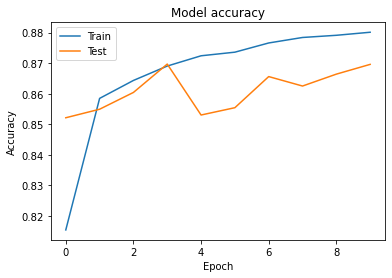

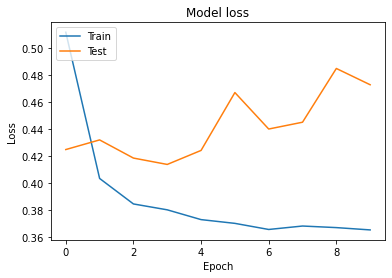

Test loss: 0.4730129837989807
Test accuracy: 0.8695999979972839
313/313 [==============================] - 1s 4ms/step


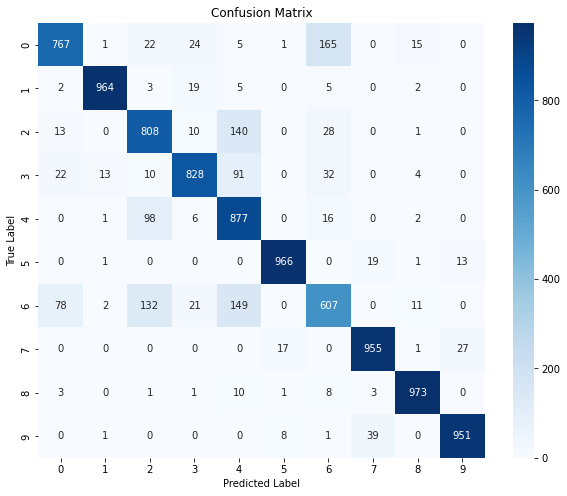


Classification Report:
               precision    recall  f1-score   support

           0     0.8667    0.7670    0.8138      1000
           1     0.9807    0.9640    0.9723      1000
           2     0.7523    0.8080    0.7792      1000
           3     0.9109    0.8280    0.8675      1000
           4     0.6868    0.8770    0.7703      1000
           5     0.9728    0.9660    0.9694      1000
           6     0.7042    0.6070    0.6520      1000
           7     0.9400    0.9550    0.9474      1000
           8     0.9634    0.9730    0.9682      1000
           9     0.9596    0.9510    0.9553      1000

    accuracy                         0.8696     10000
   macro avg     0.8737    0.8696    0.8695     10000
weighted avg     0.8737    0.8696    0.8695     10000



In [52]:
##---------Type the code below this line------------------##
# Define the RMSProp optimizer with learning rate 0.001 (default)
model_RMS_Prop = Sequential([
    Flatten(input_shape=(28, 28)),  # Input layer: flattens the 28x28 pixel image into a 784 element array
    Dense(512, activation='relu'),  # Hidden layer: 512 neurons, ReLU activation
    Dense(256, activation='relu'),  # Hidden layer: 256 neurons, ReLU activation,  
    Dense(128, activation='relu'),  # Hidden layer: 128 neurons, ReLU activation,  
    Dense(10, activation='softmax')  # Output layer: 10 neurons (for the 10 classes), Softmax activation
])
model_RMS_Prop.summary()
rmsprop = RMSprop(lr=0.001)
# Compile the model
model_RMS_Prop.compile(optimizer=rmsprop, loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history_RMS_Prop=model_RMS_Prop.fit(train_images, train_labels_encoded, epochs=10, batch_size=32, validation_data=(test_images, test_labels_encoded))
loss, accuracy = model_RMS_Prop.evaluate(test_images, test_labels_encoded, verbose=0)
model_result = {
    'model': 'Model with RMS Prop',
    'loss': loss,
    'accuracy': accuracy
}
# Add the results to the list
model_results.append(model_result)
plt.figure()
plt.plot(history_RMS_Prop.history['accuracy'])
plt.plot(history_RMS_Prop.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the training and validation loss history
plt.figure()
plt.plot(history_RMS_Prop.history['loss'])
plt.plot(history_RMS_Prop.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Report the testing accuracy and loss
test_loss, test_accuracy = model_RMS_Prop.evaluate(test_images, test_labels_encoded, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# Predict the values from the test dataset
y_pred = model_RMS_Prop.predict(test_images)
# Convert predictions from one hot encoded to labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
conf_mtx = confusion_matrix(test_labels, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mtx, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Report performance metrics
print('\nClassification Report:\n', classification_report(test_labels, y_pred_classes, digits=4))

### 10.2 Adam with the choice of Hyper Parameters

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_60 (Dense)            (None, 512)               401920    
                                                                 
 dense_61 (Dense)            (None, 256)               131328    
                                                                 
 dense_62 (Dense)            (None, 128)               32896     
                                                                 
 dense_63 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.4811 - accuracy: 0.8246 - val_loss: 0.5767 - val_accuracy: 0.7980
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.3647 - accuracy: 0.8660 - val_loss: 0.4412 - val_accuracy: 0.8513
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3257 - accuracy: 0.8790 - val_loss: 0.3853 - val_accuracy: 0.8626
Epoch 4/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.3012 - accuracy: 0.8885 - val_loss: 0.3686 - val_accuracy: 0.8661
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2858 - accuracy: 0.8933 - val_loss: 0.3658 - val_accuracy: 0.8691
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2698 - accuracy: 0.8985 - val_loss: 0.3272 - val_accuracy: 0.8842
Epoch 7/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2575 - accuracy: 0.9034 - val_loss: 0.3462 -

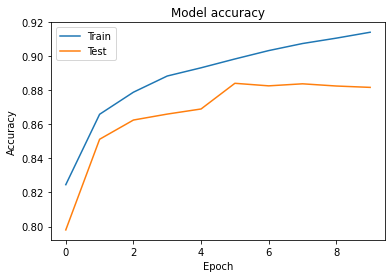

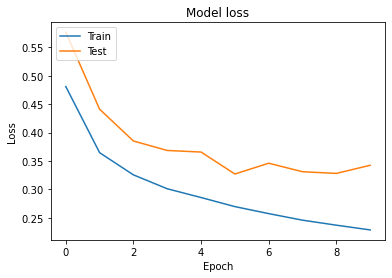

Test loss: 0.3425392508506775
Test accuracy: 0.8817999958992004
313/313 [==============================] - 2s 5ms/step


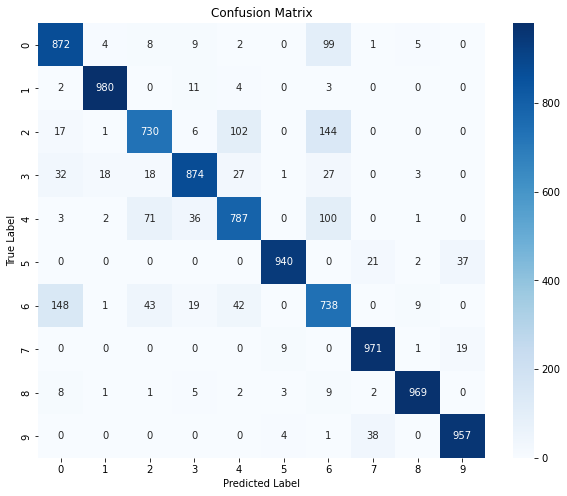


Classification Report:
               precision    recall  f1-score   support

           0     0.8059    0.8720    0.8377      1000
           1     0.9732    0.9800    0.9766      1000
           2     0.8381    0.7300    0.7803      1000
           3     0.9104    0.8740    0.8918      1000
           4     0.8147    0.7870    0.8006      1000
           5     0.9822    0.9400    0.9607      1000
           6     0.6583    0.7380    0.6959      1000
           7     0.9400    0.9710    0.9552      1000
           8     0.9788    0.9690    0.9739      1000
           9     0.9447    0.9570    0.9508      1000

    accuracy                         0.8818     10000
   macro avg     0.8846    0.8818    0.8823     10000
weighted avg     0.8846    0.8818    0.8823     10000



In [53]:
# Define the Adam optimizer with learning rate 0.001 (default)
model_Adam = Sequential([
    Flatten(input_shape=(28, 28)),  # Input layer: flattens the 28x28 pixel image into a 784 element array
    Dense(512, activation='relu'),  # Hidden layer: 512 neurons, ReLU activation
    Dense(256, activation='relu'),  # Hidden layer: 256 neurons, ReLU activation,  
    Dense(128, activation='relu'),  # Hidden layer: 128 neurons, ReLU activation,  
    Dense(10, activation='softmax')  # Output layer: 10 neurons (for the 10 classes), Softmax activation
])
model_Adam.summary()
adam = Adam(lr=0.001)
# Compile the model
model_Adam.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
History_Adam=model_Adam.fit(train_images, train_labels_encoded, epochs=10, batch_size=32, validation_data=(test_images, test_labels_encoded))
loss, accuracy = model_Adam.evaluate(test_images, test_labels_encoded, verbose=0)
model_result = {
    'model': 'Model with Adam',
    'loss': loss,
    'accuracy': accuracy
}
# Add the results to the list
model_results.append(model_result)
plt.figure()
plt.plot(History_Adam.history['accuracy'])
plt.plot(History_Adam.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the training and validation loss history
plt.figure()
plt.plot(History_Adam.history['loss'])
plt.plot(History_Adam.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Report the testing accuracy and loss
test_loss, test_accuracy = model_Adam.evaluate(test_images, test_labels_encoded, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# Predict the values from the test dataset
y_pred = model_Adam.predict(test_images)
# Convert predictions from one hot encoded to labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
conf_mtx = confusion_matrix(test_labels, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mtx, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Report performance metrics
print('\nClassification Report:\n', classification_report(test_labels, y_pred_classes, digits=4))

# 11. Conclusion - Score: 1 mark

Comparing the sections 4.1, 5.2, 8, 9, and 10, present your observations on which model or architecture or regualiser or optimiser perfomed better.


In [54]:
##---------Type the code below this line------------------##
# Print the results for all models
for model_result in model_results:
    print(model_result)

{'model': 'sequential_6', 'loss': 0.35590416193008423, 'accuracy': 0.8723000288009644}
{'model': 'Model with One Layer less', 'loss': 0.37149250507354736, 'accuracy': 0.8652999997138977}
{'model': 'Model with One Layer More', 'loss': 0.3675128221511841, 'accuracy': 0.8680999875068665}
{'model': 'Model with Drop Out', 'loss': 0.36180397868156433, 'accuracy': 0.8694999814033508}
{'model': 'Model with L2 Regulariser', 'loss': 0.4194435179233551, 'accuracy': 0.8687999844551086}
{'model': 'Model with RMS Prop', 'loss': 0.4730129837989807, 'accuracy': 0.8695999979972839}
{'model': 'Model with Adam', 'loss': 0.3425392508506775, 'accuracy': 0.8817999958992004}


### NOTE


All Late Submissions will incur a <b>penalty of -2 marks </b>. So submit your assignments on time.

Good Luck